In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Step 1: Load dataset**

In [33]:
url = 'https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv'
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=names, header=8)
df.head()  # Display first few rows of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Step 2: Data visualisation**

Below is some example code to visualise the data in different ways. See how you can plot the data in different ways to gain a better understanding. 

Think about what might affect the quality of our data. 
- Are there any erroneous values? 
- Are there any features which may be more valuable than others?

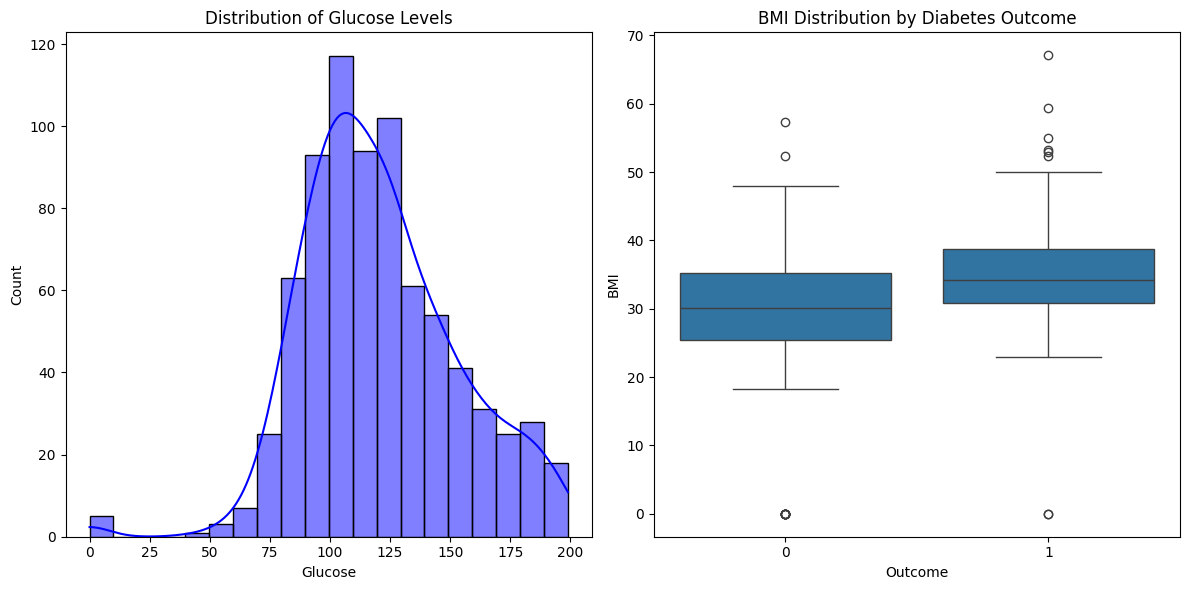

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Glucose'], bins=20, kde=True, color='blue')
plt.title('Distribution of Glucose Levels')

plt.subplot(1, 2, 2)
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('BMI Distribution by Diabetes Outcome')

plt.tight_layout()
plt.show()

**Step 3: Basic statistics**

Below shows how we can calculate some basic statistics, identify what features are most discriminatory between the diabetic (Outcome equals 1) and non-diabetic group (Outcome equals 0).

In [8]:
print("Mean Glucose level:", df['Glucose'].mean())
print("Median Age:", df['Age'].median())
print("Correlation between Glucose and BMI:")
print(df[['Glucose', 'BMI']].corr())

Mean Glucose level: 120.89453125
Median Age: 29.0
Correlation between Glucose and BMI:
          Glucose       BMI
Glucose  1.000000  0.221071
BMI      0.221071  1.000000


**Step 4: Predictive Modelling (Logistic Regression)**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

Accuracy: 75%
Sensitivity: 67%
Confusion Matrix:
[[78 21]
 [18 37]]


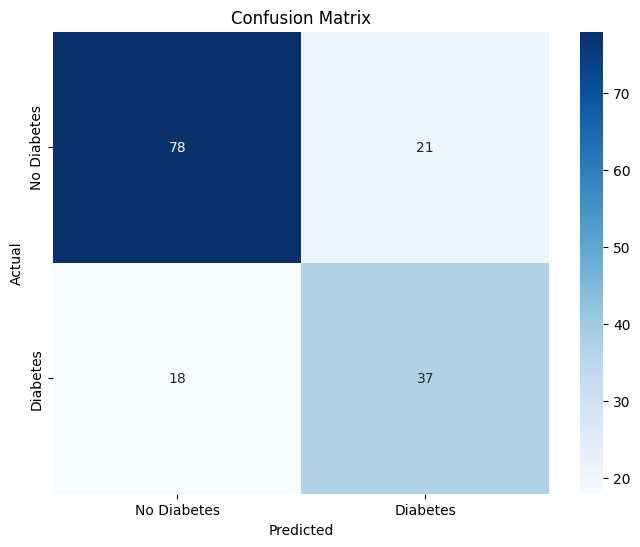

In [32]:
# Prepare data
X = df.drop('Outcome', axis=1)
y = df['Outcome']

## Optional: Explore how the features input into the model affect the performance
# selected_feats = ['Age', 'BMI']
# X = X[selected_feats]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000) # Try adding class_weight = 'balanced' and see what that does to the accuracy and sensitivity
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {round(accuracy*100)}%")
print(f"Sensitivity: {round(sensitivity*100)}%")
print("Confusion Matrix:")
print(conf_matrix)

# Visualize confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()